#### Import libraries

In [70]:
import pandas as pd
import geopandas as gpd
from census import Census
import matplotlib.pyplot as plt
import contextily as ctx
pd.options.display.max_columns =200
c = Census("d95e144b39e17f929287714b0b8ba9768cecdc9f") 

# Social Vulnerability Index for Community Health Worker Allocation

This notebook shows preliminary mapping of the CDC's [Social Vulnerability Index](https://svi.cdc.gov/). This index is built using American Community Survey 5 year estimates (2014-2018) and is comprised of four thematic categories. Multiple ACS variables are used within each thematic category:

#### Socioeconomic Status
- below poverty level
- unemployment
- median household income
- education level (no high school diploma)  

#### Household Composition and Disability
- number of residents >65
- number of residents > 17 years
- single parent households
- disability status

#### Minority Status and Language  
- non-white population
- language spoken (speaks english "less than well")  

#### Housing and Transportation  
- multi-unit housing
- mobile homes
- crowded living conditions
- no vehicle
- group quarters

Full documentation for 2018 data is available [here](https://svi.cdc.gov/data-and-tools-download.html).


### I. Importing SVI data and computing state percentile ranking

The CDC uses both a USA-wide percentile ranking and a state by state percentile ranking. For our project given that funding is likely going to be managed at a state level using a state percentile ranking makes the most sense and will be most sensitive to regional socioeconomic differences. What do others think?

In [8]:
# import SVI data
svi = gpd.read_file("data/svi/SVI2018_US_tract.geojson")
svi_tribal = gpd.read_file("data/svi/SVI2018_tribal_tract.geojson")
svi_puerto_rico = gpd.read_file("data/svi/SVI2018_PuertoRico_tract.geojson")

In [11]:
## add in puerto rico to USA-wide dataset
svi_pr = svi.append(svi_puerto_rico)

## select just locations with non-N/A values for 'SPL_THEMES' field
svi_pr_forRPL = svi_pr[svi_pr['SPL_THEMES'] != -999].copy()
svi_pr_forRPL_na = svi_pr[svi_pr['SPL_THEMES'] == -999].copy()

## calculate state percentile rank for combined svi variable
svi_pr_forRPL['RPL_ThemesStates'] = svi_pr_forRPL.groupby('STATE')['SPL_THEMES'].rank(pct=True)

## append no data values back to dataset for complete set
svi_states = svi_pr_forRPL.append(svi_pr_forRPL_na)

### II. Mapping CDC Social Vulnerability Index  

The following are preliminary maps of the state SVI rankings. 

In [26]:
## importing county shapefiles to be able to make regional maps
pr_view = gpd.read_file("data/puerto_rico.geojson")
ak_view = gpd.read_file("data/alaska.geojson")
hi_view = gpd.read_file("data/hawaii.geojson")
lower_view = gpd.read_file("data/lower_48.geojson")
lower_counties = gpd.read_file("data/lower_48_county.geojson")

## reprojecting lower 48 to albers usa equal area conic
lower_view = lower_view.to_crs("ESRI:102008")

## reprojecting pr to state plane 6566 
pr_view = pr_view.to_crs('EPSG:6566')

## defining bounding boxes
lower48_xlim = ([lower_view.total_bounds[0],lower_view.total_bounds[2]])
lower48_ylim = ([lower_view.total_bounds[1],lower_view.total_bounds[3]])

#defining bounding box pr
pr_xlim = ([pr_view.total_bounds[0],pr_view.total_bounds[2]])
pr_ylim = ([pr_view.total_bounds[1],pr_view.total_bounds[3]])

#### USA as a whole

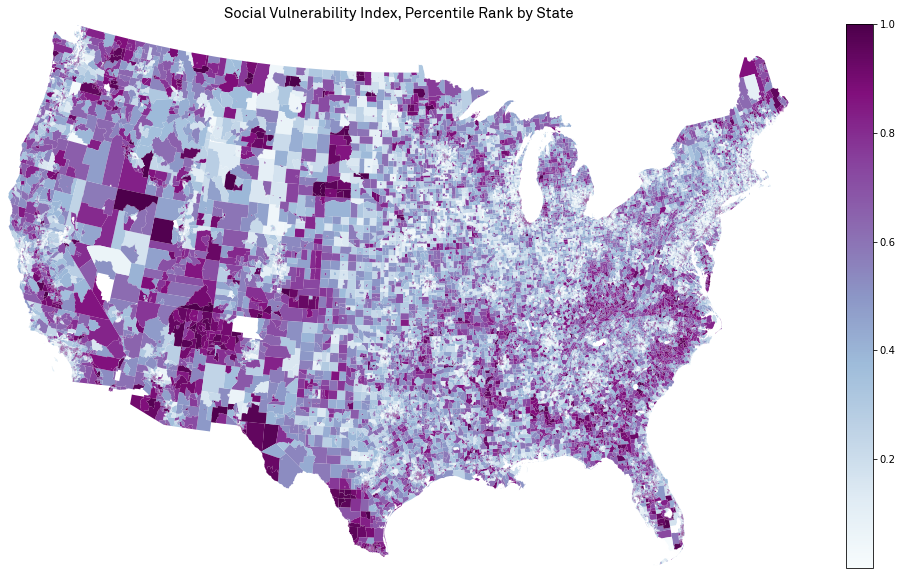

In [55]:
## for plotting -- reprojecting to albers usa
svi_states_albers = svi_states.to_crs("ESRI:102008")

fig, ax = plt.subplots(figsize=(20,10))
svi_states_albers.plot(ax=ax, column='RPL_ThemesStates', legend=True,cmap="BuPu")
ax.set_xlim(lower48_xlim)
ax.set_ylim(lower48_ylim)
ax.set_title("Social Vulnerability Index, Percentile Rank by State", fontname="Akkurat Pro", fontsize=15)
ax.set_axis_off()


#### Connecticut

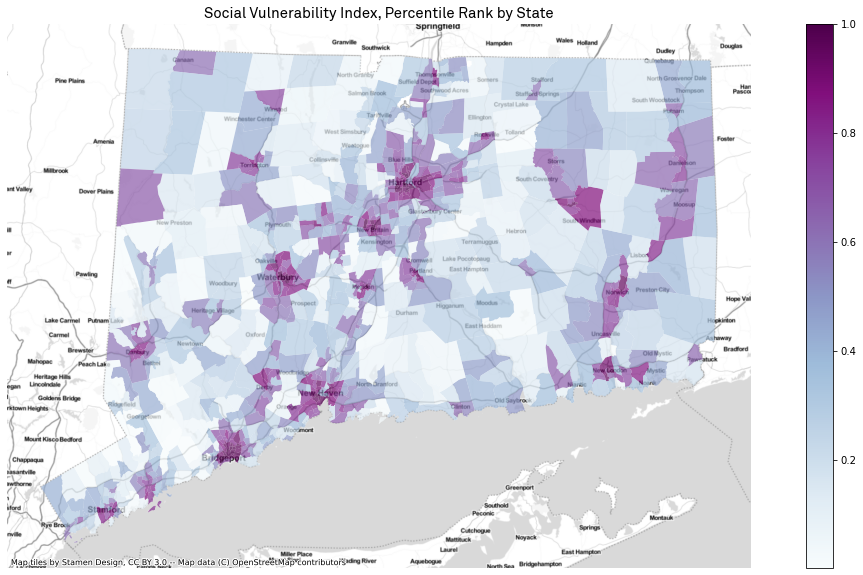

In [102]:
## creating a new haven filter 
ct = lower_counties[lower_counties['STATEFP'] == '09']
ct = ct.to_crs('EPSG:2234')

## subsetting just connecticut data:
ct_svi = svi_states[svi_states['ST']=='09']
ct_svi = ct_svi.to_crs('EPSG:2234')

fig, ax = plt.subplots(figsize=(20,10))
ct_svi.plot(ax=ax, column='RPL_ThemesStates',legend=True,cmap="BuPu",alpha=.7)
# ax.set_xlim(lower48_xlim)
# ax.set_ylim(lower48_ylim)
ctx.add_basemap(ax, crs=ct.crs.to_string(),source=ctx.providers.Stamen.TonerLite)
ax.set_title("Social Vulnerability Index, Percentile Rank by State", fontname="Akkurat Pro", fontsize=15)
ax.set_axis_off()

#### New Haven

In [98]:
# setting nh_xlim = ([ct[ct['COUNTYFP']=='009'].total_bounds[0],
 ct[ct['COUNTYFP']=='009'].total_bounds[2]])
nh_ylim = ([ct[ct['COUNTYFP']=='009'].total_bounds[1],
 ct[ct['COUNTYFP']=='009'].total_bounds[3]])


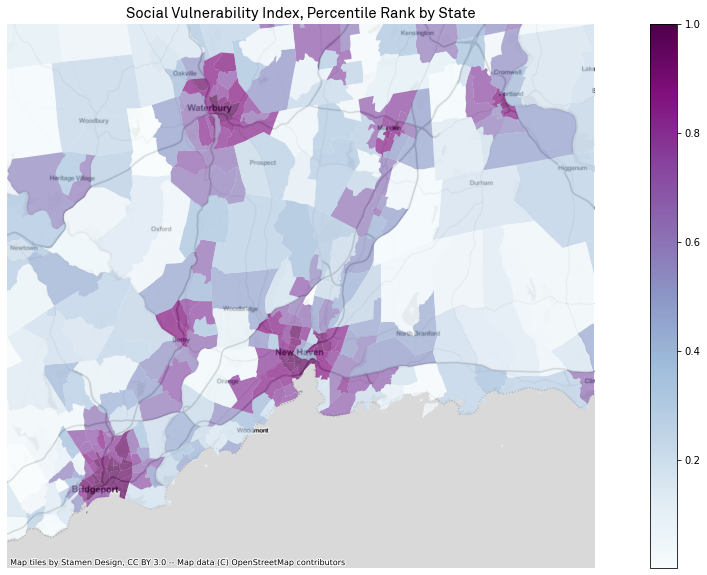

In [109]:
fig, ax = plt.subplots(figsize=(20,10))
ct_svi.plot(ax=ax, column='RPL_ThemesStates',legend=True,cmap="BuPu",alpha=.7)
# ct.plot(ax=ax,alpha=0.5)
ax.set_xlim(nh_xlim)
ax.set_ylim(nh_ylim)
ctx.add_basemap(ax, crs=ct.crs.to_string(),
                source=ctx.providers.Stamen.TonerLite)
ax.set_title("Social Vulnerability Index, Percentile Rank by State", fontname="Akkurat Pro", fontsize=15)
ax.set_axis_off()

#### New York City

#### Puerto Rico

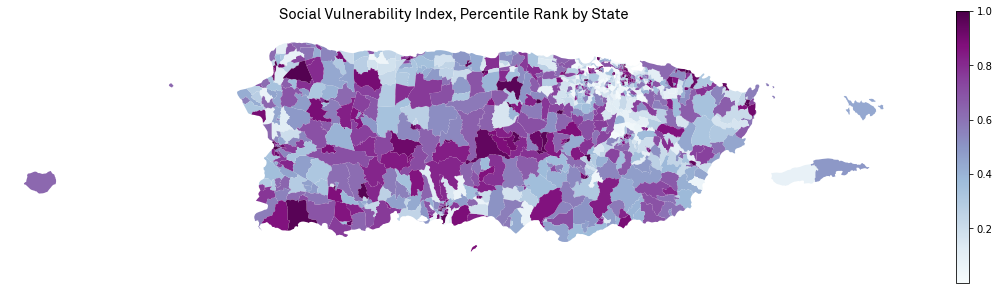

In [56]:
svi_states_pr = svi_states.to_crs('EPSG:6566')

fig, ax = plt.subplots(figsize=(20,5))
svi_states_pr.plot(ax=ax, column='RPL_ThemesStates', legend=True,cmap="BuPu")
ax.set_xlim(pr_xlim)
ax.set_ylim(pr_ylim)
ax.set_title("Social Vulnerability Index, Percentile Rank by State", fontname="Akkurat Pro", fontsize=15)
ax.set_axis_off()
